# "Продвинутый Python". Магистерская программа ВШЭ.

**Цель курса**: получить предстваление о принципах создания сервисов и реализовать их в собственном ML-проекте.

**Ключевые навыки**: ООП, Django, luigi

### Отчётность

Зачётные баллы будут даваться за:

1) __Курсовой проект__ 

В курсовом проекте необходимо будет сделать сервис, например, для решения какой-нибудь ML-задачи (но не обязательно). Список требований к сервису будет озвучен позже. За проект можно получить до **6 баллов**, причем проект должен сдаваться не за один раз. 

2) __Контрольные работы, контесты__ (но это не точно)

Проводятся на занятиях. Могут принести до **2 баллов**.

3) __Домашние задания__

Могут принести неопределенное количество баллов.

4) __Задания на занятии__

Несложные задания за мелкие баллы.

Суммарно можно будет **получить больше 10 баллов**. **Баллов хватит на всех :)**

Все задачи должны быть оформлены в соответствии с PEP 8.

## Занятие №0. Core libraries. Разминка.

In [102]:
import sys

**Как получить путь к интерпретатору?**

In [103]:
sys.executable

'/Users/natalia/anaconda3/bin/python'

**Как узнать, где ищутся модули для импорта?**

In [104]:
sys.path

['',
 '/Users/natalia/anaconda3/lib/python36.zip',
 '/Users/natalia/anaconda3/lib/python3.6',
 '/Users/natalia/anaconda3/lib/python3.6/lib-dynload',
 '/Users/natalia/anaconda3/lib/python3.6/site-packages',
 '/Users/natalia/anaconda3/lib/python3.6/site-packages/aeosa',
 '/Users/natalia/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/natalia/.ipython']

**Что может помочь написать кросс-платформенный код?**

In [105]:
sys.platform

'darwin'

**Как перенаправить поток вывода?**

In [106]:
with open('log.txt', 'w') as f:
    print(2, file = f)

### Задача №0

Вывести распределение слов в Zen of Python.

In [107]:
from io import StringIO

import sys

Перенаправим поток вывода в переменную

In [108]:
stdout = sys.stdout

text_from_this = StringIO()
sys.stdout = text_from_this

Запишем Zen of Python в переменную `text_from_this` и вернем консольный вывод

In [109]:
import this

In [110]:
sys.stdout = stdout 

In [111]:
import re
from collections import Counter, OrderedDict

In [112]:
mapping_rules = {
    "[-.\n,*!]": " ",
    "n't": " not",
    "'re": " are",
    "it's": "it is",
    "let's": "let us"
}

Подумайте, в чем непотимальность следующего блока? Как сделать оптимальным?

In [113]:
zen_string = text_from_this.getvalue().lower()

for rule in mapping_rules:
    zen_string = re.sub(rule, mapping_rules[rule], zen_string)

In [114]:
words_distribution = Counter(zen_string.split())
words_distribution.most_common()

[('is', 11),
 ('better', 8),
 ('than', 8),
 ('the', 6),
 ('to', 5),
 ('of', 3),
 ('are', 3),
 ('although', 3),
 ('never', 3),
 ('be', 3),
 ('one', 3),
 ('it', 3),
 ('idea', 3),
 ('complex', 2),
 ('special', 2),
 ('not', 2),
 ('should', 2),
 ('unless', 2),
 ('obvious', 2),
 ('way', 2),
 ('do', 2),
 ('may', 2),
 ('now', 2),
 ('if', 2),
 ('implementation', 2),
 ('explain', 2),
 ('a', 2),
 ('zen', 1),
 ('python', 1),
 ('by', 1),
 ('tim', 1),
 ('peters', 1),
 ('beautiful', 1),
 ('ugly', 1),
 ('explicit', 1),
 ('implicit', 1),
 ('simple', 1),
 ('complicated', 1),
 ('flat', 1),
 ('nested', 1),
 ('sparse', 1),
 ('dense', 1),
 ('readability', 1),
 ('counts', 1),
 ('cases', 1),
 ('enough', 1),
 ('break', 1),
 ('rules', 1),
 ('practicality', 1),
 ('beats', 1),
 ('purity', 1),
 ('errors', 1),
 ('pass', 1),
 ('silently', 1),
 ('explicitly', 1),
 ('silenced', 1),
 ('in', 1),
 ('face', 1),
 ('ambiguity', 1),
 ('refuse', 1),
 ('temptation', 1),
 ('guess', 1),
 ('there', 1),
 ('and', 1),
 ('preferably'

### Домашнее задание №0 [0.2 балла]

**Условие**:

Функция `delete_zeros_from_array` принимает на вход массив целых чисел из промежутка [0; 5] и удалает из него все _нули_. Алгоритм должен иметь сложность `O(N)`, где N - длина массива, и использовать `O(1)` дополнительной памяти.

Построить **графики** зависимости времени работы алгоритма от количества элементов в нем. 

**Примечания**:

1) Для наглядности лучше генерить массивы, в которых количество удаляемых элементов **больше трети** от всех элементов.

2) В такой постановке можно проверить, как разработчик выбирает имена переменных и думает ли о функции глобально. Например, следующим вопросом было бы "А что если хотим удалять единицы?"

In [350]:
import numpy as np
import time
import random

In [351]:
def gen_array(N, frac = 0.4):
    """
        Function for generating an array in range [0,5] with 0-s constituting given fraction of the length.
        
        :param N: Length of the final array
        :param frac: fraction of zeros in the final array. Dafault: 0.4
        :type array: int 
        :returns: Array of len N from range [0, 5]
        :rtype: list
        
    """
    n = round(N * frac)
    arr = np.random.randint(1, 6, N-n)
    arr_zeros = list(arr) + [0] * n
    random.shuffle(arr_zeros) # для того, чтобы распределить 0 внутри списка
    
    return arr_zeros

In [352]:
# Bad way
def bad_delete_zeros_from_array(array):
    array = [elem for elem in array if elem != 0]
    return array

In [484]:
# Not bad way
from functools import partial

def delete_elements_from_array(array, element):
    """
        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        :param element: Element that must be deleted from array
        :type element: int
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    """
    elem_counter = 0
    i = 0
    len_arr = len(array)
    
    if not isinstance(array, list):
        raise TypeError("The array type must be a list")
        
    if not isinstance(element, int):
        raise TypeError("The element type must be an integer")
        
    while i + elem_counter < len_arr:
        if array[i] != elem:
            i += 1
        else:
            array[i], array[i + elem_counter] = array[i + elem_counter], array[i]
            elem_counter += 1
            
    array = array[:(len_arr - elem_counter)]
    
    return array

delete_zeros_from_array = partial(delete_elements_from_array, element=0)

Зачем нужна doc string? Как её посмотерть?

По сути, это документация для функции/библиотеки/класса/метода, в которой приводится краткое описание данного объекта, а также спецификация параметров входа и выхода.

In [204]:
print(delete_elements_from_array.__doc__)


        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        :param element: Element that must be deleted from array
        :type element: int
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    


### Графики времени работы алгоритма

In [354]:
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt

In [386]:
def compare_time(n_repeats, max_len):
    """
    This function compares the mean time of executions of functions delete_zeros_from_array
    and bad_delete_zeros_from_array for given number of repetitions and given range of input 
    arrays lengths. 

    :param n_repeats: Number of repetitions for time measures averaging
    :type n_repeats: int
    :param max_len: Maximum length of the test array
    :type element: int
    
    """
    mean_time_eff = []
    mean_time_bad = []
    arr_lens = range(10, max_len, 10)
    for N in tqdm_notebook(arr_lens):
        consumed_time_1 = []
        consumed_time_2 = []
        for iter in range(n_repeats):
            array = gen_array(N)
            time_start = time.time()
            array = delete_zeros_from_array(array)
            consumed_time_1.append(time.time() - time_start)
            
            array = gen_array(N)
            time_start = time.time()
            array = bad_delete_zeros_from_array(array)
            consumed_time_2.append(time.time() - time_start)
            
        mean_time_eff.append(sum(consumed_time_1) / n_repeats) 
        mean_time_bad.append(sum(consumed_time_2) / n_repeats) 
       
    return arr_lens, mean_time_eff, mean_time_bad

Оценим время исполнения кода для обеих функций на 50 повторах:

In [383]:
arrays, times_eff, times_bad = compare_time(50, 10000)

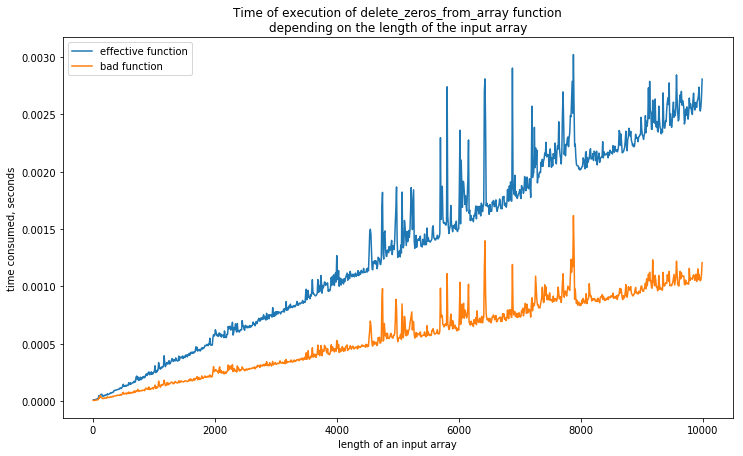

In [385]:
plt.figure(figsize = (12, 7))
plt.plot(arrays, times_eff)
plt.plot(arrays, times_bad)
plt.legend(['effective function', 'bad function'], loc='upper left')
plt.ylabel('time consumed, seconds')
plt.xlabel('length of an input array')
plt.title('Time of execution of delete_zeros_from_array function\ndepending on the length of the input array')
plt.show()

Как следует из графика, list comprehension работает быстрее, однако подход с delete_zeros_from_array более безопасен. И видно, что он соответствует требуемой сложности.

### Домашнее задание №1 [0.05 балла]

**Условие**:

Написать функцию (-и), которая принимает на вход 3 комплексных числа и выводит минимальное из них по модулю без использования функций min, max, sort и т.д.


**Комментарии**:

1) В процессе сдачи задания, можно будет получить дополнительные баллы

2) Код должен быть пригоден для промышленного использования

In [480]:
from math import sqrt
import numbers

class MinAbs:
    """ 
    This is the class that allows to get the minimum absolute value of any number (complex or real). 
    
    Input format: numbers separated by comma.
      
    Methods: 
        count_min_abs: The least number by absolute. 
        
    Usage Example:
        minabs = MinAbs(2+3j, 3+10j, 4+2j)
        min_value =  minabs.count_min_abs()
    """
    def __init__(self, *args):
        self.inputs = list(args)
        
    def complex_abs(self, value):
        
        ''' Returns the absolute of the complex number'''
        
        return sqrt(value.imag**2 + value.real**2)
    
    def simple_abs(self, value):
        
        ''' Returns the absolute of the real number'''
        
        if value <= 0:
            return value * -1
        return value
        
    def get_abs(self, value):
        
        ''' 
        Returns the absolute of any type of number (complex or real).
        Raises error of the input is not numeric.
        '''
        
        if not isinstance(value, numbers.Number):
            raise TypeError('A numeric value must be passed as an input')
        else:
            if isinstance(value, complex):
                return self.complex_abs(value)
            else:
                return self.simple_abs(value)
            
    def get_min(self, arr):
        
        '''Returns the minimum value of an array.'''
    
        min_value = arr[0]
        for i in arr[1:]:
            if i < min_value: 
                min_value = i 
            else: 
                pass
        return arr.index(min_value)
    
    def count_min_abs(self):
        
        '''Returns the least by absolute number of an input'''
        
        list_abs = [self.get_abs(inp) for inp in self.inputs]
        min_abs = self.get_min(list_abs)
        return self.inputs[min_abs]

Примеры использования:

In [481]:
minabs = MinAbs(2+3j, 3+10j, 4+2j)
minabs.count_min_abs()

(2+3j)

In [482]:
minabs = MinAbs(2+3j, 300, 4+2j)
minabs.count_min_abs()

(2+3j)

In [483]:
minabs = MinAbs(3565, 300, 15)
minabs.count_min_abs()

15

### Домашнее задание №2 [0.18 балла]

**Условие**:

Вы - банкомат, который работает по следующей схеме: считывает номер вставленной в него карты, парсит его на 4 равные части и генерирует 4 числа Фибоначчи с номерами, соответствущими распаршенным частям. Затем генерирует числа из всевозможных перестановок полученных чисел Фибоначчи (конкатенацией).

Для каждого числа из полученного набора банкомат находит НОД с введеным пользователем паролем и возвращает медиану из полученных НОДов. 

**Комментарии**:

1) Поток клиентов большой, операции повторяющиеся - хорошо бы, чтобы со временем банкомат отвечал быстрее на запросы.

2) За неполное решение также дается часть баллов.

**Ключевые слова**: lru_cache, permutations, алгоритм Евклида

In [647]:
from functools import lru_cache

In [670]:
class ATM:
       
    def parse_card(self, num):
        """
        This function takes the 16-digit bank card number and splits it into 4 bins.
        
        :param num: Card number
        :type num: str or int
        
        :returns: Array of 4 bins of the card number
        :rtype: list of integers
        """
        if isinstance(num, str):
            num_full = "".join(num.split(" "))
        elif isinstance(num, int):
            num_full = str(num)
        else: 
            raise TypeError("Wrong input type. Must be string or int.")

        if len(num_full) < 16:
            raise TypeError("Not valid card number. Must be 16 digits long.")
            
        parts = []
        for i in range(0, 16, 4):
            part = num_full[i:i+4]
            parts.append(int(part))
        return parts

    def gen_number(self, arr):
        """
        This function takes an array of integers, calculates all possible permutations 
        and returns them in concatenated way.
        
        :param arr: An array to generate numbers of
        :type arr: list of integers
        
        :returns: Array of concatenated permutations
        :rtype: list of integers
        """
        conc_numbers = []
        for perm in list(permutations(arr)):
            concats = ''.join([str(p) for p in perm])
            conc_numbers.append(int(concats)) 
        return conc_numbers
    
    
    @lru_cache(None)
    def fib(self, n):
        """
        This function calculates Fibonacci number of order n.
        
        :param n: The order of Fibonacci number
        :type n: int
        
        :returns: Fibonacci number
        :rtype: int
        """
        if n < 2:
            return n
        return fib(n-1) + fib(n-2)

    def gcd_eucl(self, a, b):
        """
        This function calculates the greatest common divisor between two numbers.
        Uses Euclidean algorithm.
        
        :param n: The order of Fibonacci number
        :type n: int
        
        :returns: Fibonacci number
        :rtype: int
        """
        if a >= b:
            dividend = a
        else:
            dividend = b

        if a <= b:
            divisor = a
        else:
            divisor = b

        while divisor != 0:
            rem = dividend % divisor
            dividend = divisor
            divisor = rem

        return dividend

    def median_gcd(self, card_num, pin):
        """
        This functions does all the calculations of the ATM.
        :param card_num: Bank card number 
        :type n: str or int
        :param pin: Card PIN-code
        :type n: int
        
        :returns: The median of the GCDs
        :rtype: int
        """
        if len(str(pin)) != 4:
            raise TypeError("Invalid PIN. Must be 4-digit number")
            
        fibs = [self.fib(p) for p in self.parse_card(card_num)]
        concats = self.gen_number(fibs)
        gcds = [self.gcd_eucl(number, pin) for number in concats]
        return sorted(gcds)[len(gcds) // 2]

#### Пример использования:

In [674]:
atm = ATM()
atm.median_gcd('2345 7654 2355 9876', 7654)

2

### Домашнее задание №3 [0 - 0.1 балла]

**Условие:**
    
Сравнить скорость работы и потребление памяти list и deque.

**Комментарий:**

Количество баллов зависит от полноты сравнения.

In [649]:
from collections import deque
from sys import getsizeof
import pandas as pd

Возьмем методы, общие для list и deque и сделаем своего рода маппинг. Затем создадим объекты с одинаковым содержанием и проведем операции из маппинга.

In [660]:
meth_map = [['append(0)', 'append(0)'],
            ['appendleft(0)', 'insert(0, 0)'],
            ['extend(l_init)', 'extend(d_init)'],
            ['pop()', 'pop()'],
            ['popleft()', 'pop(0)'],
            ['remove(0)', 'remove(0)'],
            ['reverse()', 'reverse()'],
            ['count(0)', 'count(0)']]

labels = ['append an element to the end',
          'append an element to the beginning',
          'extend by the object itself',
          'pop the last element',
          'pop the first element',
          'remove an element',
          'reverse',
          'count the number of elements equal to x']

In [666]:
def compare_time(func_map, n_repeats, max_len):
    mean_time_deq = []
    mean_time_list = []
    mem_l = []
    mem_d = []
    arr_lens = range(10, max_len + 1, 100)
    for len in arr_lens:
        
        cons_time_1 = []
        cons_time_2 = []
        
        l_init = list(range(len))
        d_init = deque(l_init)
        
        mem_l.append(getsizeof(l_init))
        mem_d.append(getsizeof(d_init))
        
        for iter in range(n_repeats):
            list_ex = l_init.copy()
            deq_ex = d_init.copy()

            time_start = time.time()
            exec('{}.{}'.format(deq_ex, func_map[0]))
            cons_time_1.append(time.time() - time_start)

            time_start = time.time()
            exec('val = {}.{}'.format(list_ex, func_map[1]))
            cons_time_2.append(time.time() - time_start)

        mean_time_deq.append(sum(cons_time_1) / n_repeats) 
        mean_time_list.append(sum(cons_time_2) / n_repeats)

    return mean_time_deq, mean_time_list, mem_l, mem_d, arr_lens

In [667]:
import numpy as np

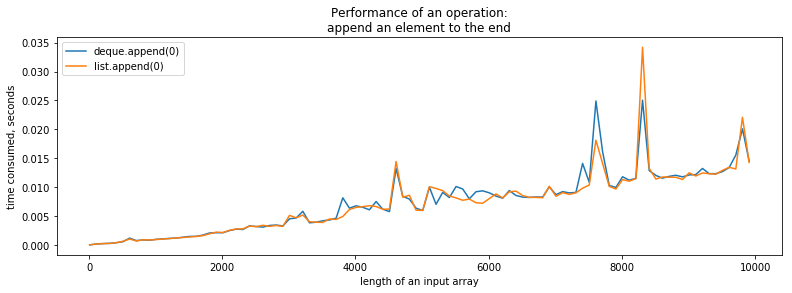

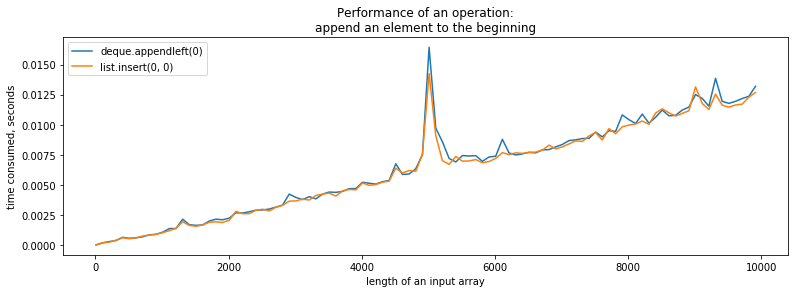

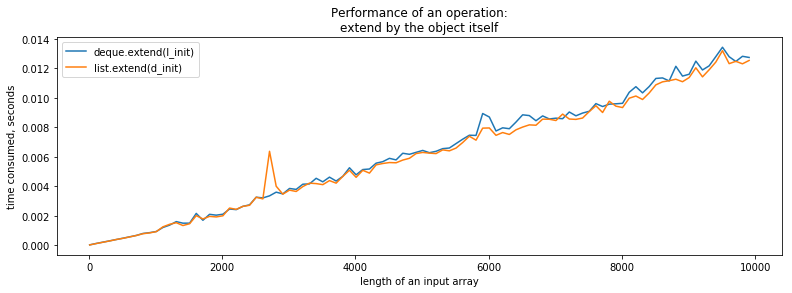

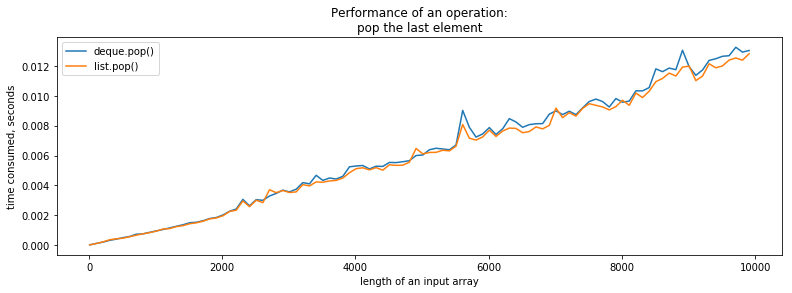

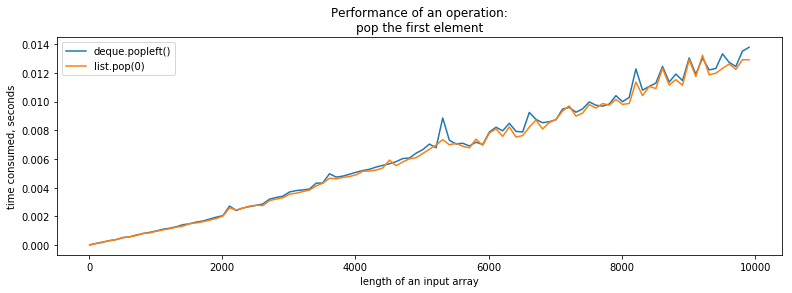

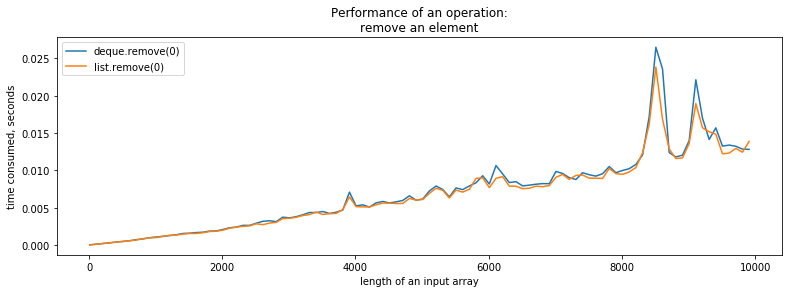

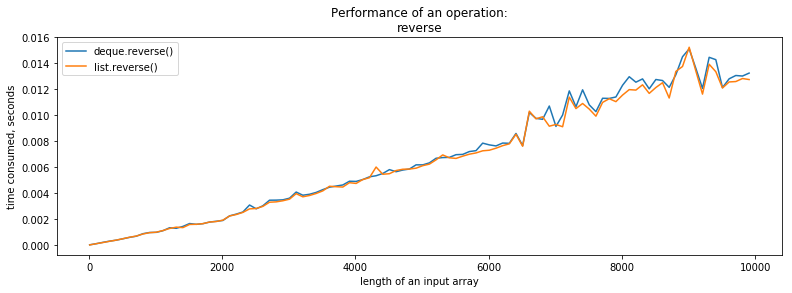

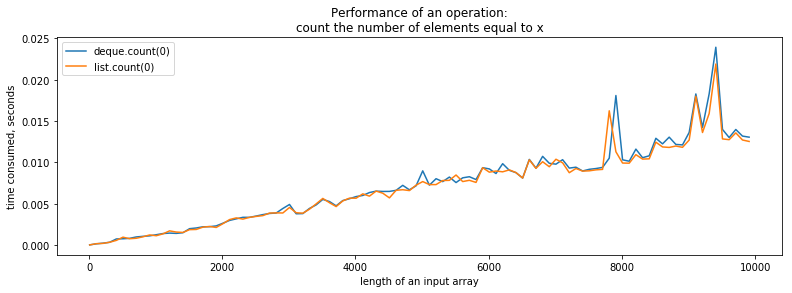

In [668]:
mem_l = []
mem_d = []
mean_l = []
mean_d = []
for i, method in enumerate(meth_map):
    plt.figure(figsize = (13, 4))
    time_deque, time_list, memory_list, memory_deque, arrays = compare_time(method, 10, 10000)
    
    mean_d.append(np.mean(time_deque))
    mean_l.append(np.mean(time_list))    
    mem_l.append(memory_list)
    mem_d.append(memory_deque)
    
    plt.plot(arrays, time_deque)
    plt.plot(arrays, time_list)
    plt.legend(['deque.{}'.format(method[0]), 'list.{}'.format(method[1])], loc='upper left')
    plt.ylabel('time consumed, seconds')
    plt.xlabel('length of an input array')
    plt.title('Performance of an operation:\n{}'.format(labels[i]))
plt.show()

Кажется, что deque в некоторых случаях справляется быстрее с операциями, которые затрагивают концы объекта (append или appendleft), однако однозначно дольше отрабатывает на операциях, подразумевающие поиск по всему массива (например, count).

#### Потребление памяти:

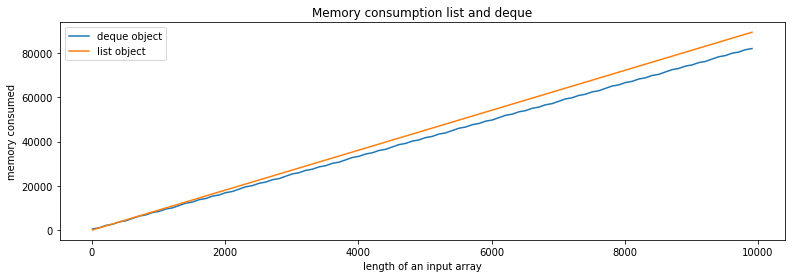

In [669]:
plt.figure(figsize = (13, 4))
plt.plot(arrays, mem_d[0])
plt.plot(arrays, mem_l[0])
plt.legend(['deque object', 'list object'], loc='upper left')
plt.ylabel('memory consumed')
plt.xlabel('length of an input array')
plt.title('Memory consumption list and deque')
plt.show()

При этом объект типа deque потребляет меньше памяти.